In [116]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [117]:
G = nx.gnp_random_graph(100, 0.5, directed=False)

In [118]:
degrees = []
for node in G.nodes:
    degrees.append(G.degree(node))

In [119]:
fit_params = stats.powerlaw.fit(degrees)
print(fit_params)

(1.7430443927704555, 35.55487315159573, 23.445126848404275)


(array([0.00391304, 0.01173913, 0.01565217, 0.04304348, 0.08608696,
        0.09391304, 0.04695652, 0.0626087 , 0.0273913 ]),
 array([36.        , 38.55555556, 41.11111111, 43.66666667, 46.22222222,
        48.77777778, 51.33333333, 53.88888889, 56.44444444, 59.        ]),
 [<matplotlib.patches.Polygon at 0x739b81cc3f40>])

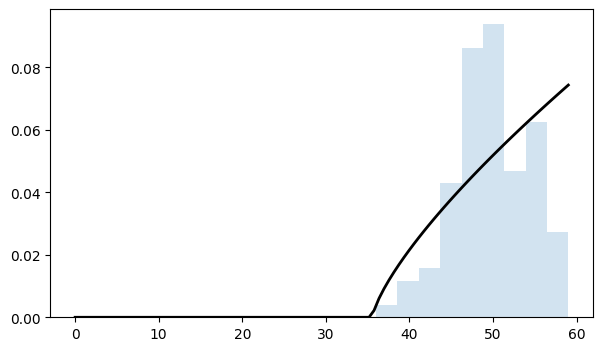

In [120]:
plt.figure(figsize=(7,4))
x = np.linspace(0, max(degrees), 100)
pdff = stats.powerlaw.pdf(x, *fit_params)
plt.plot(x, pdff, 'k-', lw=2, label='Power law fit')
plt.hist(degrees, bins='auto', histtype='stepfilled', density=True, alpha=0.2, label='Degree distribution')

In [121]:
def kld(p,q):
    assert len(p) == len(q)
    # assume they are defined on the same sample space
    kl = 0
    for ii in range(len(p)):
        if p[ii] > 0 and q[ii] > 0:
            kl += p[ii] * np.log(p[ii]/q[ii])
    return kl

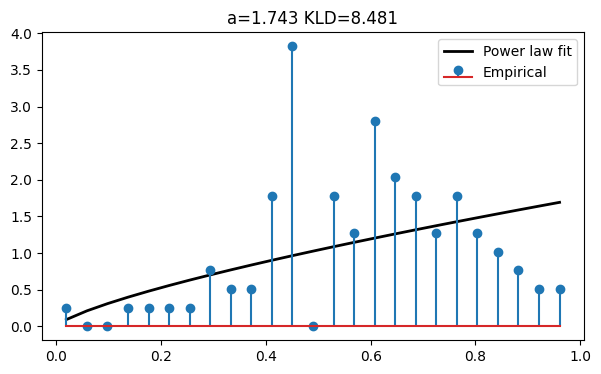

In [122]:
degrees_normalized = (degrees - fit_params[1]) / fit_params[2]
hist, bins = np.histogram(degrees_normalized, 
                          bins=25, 
                          #range=(0, np.max(degrees_normalized)), 
                          density=True)
bins = bins[0:-1]
# shifted
plt.figure(figsize=(7,4))
x = bins
pdff = stats.powerlaw.pdf(x, fit_params[0])
kl = kld(hist, pdff)
plt.plot(x, pdff, 'k-', lw=2, label='Power law fit')
plt.stem(bins, hist, label='Empirical')
plt.title('a=%0.03f KLD=%0.03f' % (fit_params[0], kl))
plt.legend()

In [123]:
min(degrees_normalized)

0.018985900621585578

In [124]:
stats.powerlaw.pdf(min(degrees_normalized), fit_params[0])

0.09164450017487058

In [125]:
np.log(0)

/tmp/ipykernel_131675/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [126]:
# try the method outlined here:https://lordgrilo.github.io/complexity-book/2-networkx/nb04_powerlaw_fitting.html#the-powerlaw-package

from collections import Counter 
deg=dict(G.degree()).values()
deg_distri=Counter(deg)

Text(0, 0.5, '$P(k)$')

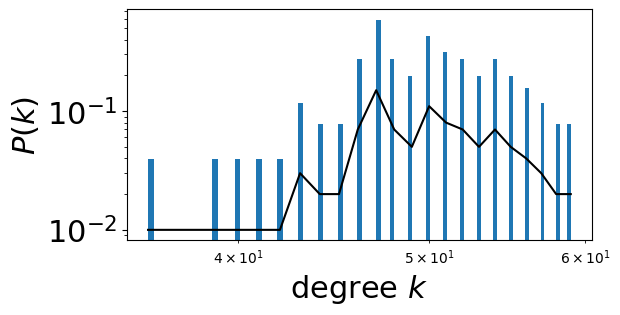

In [129]:
x=[]
y=[]
for i in sorted(deg_distri):   
    x.append(i)
    y.append(deg_distri[i]/len(G))


plt.figure(figsize=(6,3))
plt.hist(deg, bins=90, density=True, log=True, histtype='stepfilled')

plt.plot(x,y,'black','o')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)
plt.xlabel('degree $k$', fontsize=22)
plt.ylabel('$P(k)$', fontsize=22)

In [131]:
import powerlaw as pwl
degree=list(deg)
pwl_distri=pwl.pdf(degree, bins=90)

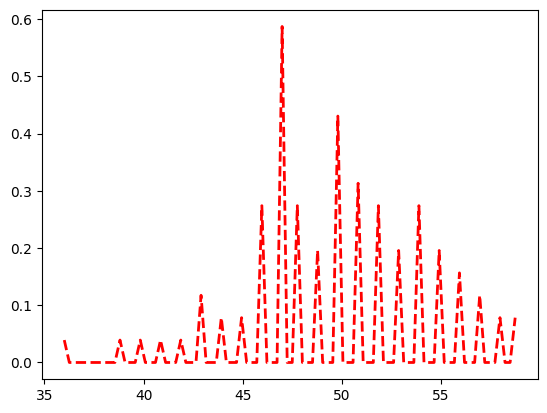

In [135]:
plt.plot(pwl_distri[0][0:-1],pwl_distri[1],'r--',linewidth=2)

In [139]:
fo = pwl.Fit(pwl_distri[1])

Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [144]:
fo.power_law.KS()

0.19012570217966396